# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
import numpy as np
import torch
from torchvision import transforms
import torchvision
from tqdm import tqdm
from torch import nn
from torch.nn import functional as F
from os.path import isfile, join
import PIL
import os
from PIL import Image
from sklearn.metrics import accuracy_score
from typing import Dict, List, Tuple, Union
# You may add any imports you need

In [59]:
!wget https://disk.yandex.ru/d/BNR41Vu3y0c7qA

--2021-11-14 13:26:11--  https://disk.yandex.ru/d/BNR41Vu3y0c7qA
Распознаётся disk.yandex.ru (disk.yandex.ru)… 87.250.250.50
Подключение к disk.yandex.ru (disk.yandex.ru)|87.250.250.50|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 25044 (24K) [text/html]
Сохранение в: «BNR41Vu3y0c7qA.7»

BNR41Vu3y0c7qA.7    100%[===================>]  24,46K  --.-KB/s    за 0s      

2021-11-14 13:26:12 (63,5 MB/s) - «BNR41Vu3y0c7qA.7» сохранён [25044/25044]



Image format: JPEG; shape: (64, 64); color scheme: RGB


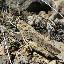

In [3]:
img = Image.open('dataset/train/class_095/00000.jpg')
print(f"Image format: {img.format}; shape: {img.size}; color scheme: {img.mode}")
img

In [4]:
path = "dataset/train"

In [11]:
# images_dir = []

# for f in os.listdir(path):
#     root_class = path + f'/{f}'
#     if f == '.DS_Store':
#         continue
#     print(root_class)
#     for im in os.listdir(root_class):
#         if isfile(join(root_class, im)):
#             images_dir.append(join(root_class, im))

### Подготовка данных

In [20]:
class MyDataset_(torch.utils.data.Dataset):
    def __init__(
        self,
        root: str,
        transform: transforms.Compose = None,
    ) -> None:
        """
        :param root: путь к папке с данными
        :param transform: transforms of the images and labels
        """
        self.root = os.path.expanduser(root)
        self.transform = transform
        (self.data_path, self.labels_path) = ([], [])

        def load_images(path: str) -> List[str]:
            """
            Возвращает список с путями до всех изображений

            :param path: путь к папке с данными
            :return: лист с путями до всех изображений
            """
            images_dir = []
            
            for f in os.listdir(path):
                if f == '.DS_Store':
                    continue
                root_class = path + f'/{f}'
                for im in os.listdir(root_class):
                    if isfile(join(root_class, im)):
                        images_dir.append(join(root_class, im))
            return images_dir

        self.data_path = load_images(self.root)

    def __getitem__(self, index: int) -> torch.Tensor:
        """
        :param index: sample index
        :return: tuple (img, target) with the input data and its label
        """
        img = Image.open(self.data_path[index])
        if self.transform is not None:
            img = self.transform(img)
        return tuple([img, int(self.data_path[index][-13:-10])])

    def __len__(self):
        return len(self.data_path)

    

In [24]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Normalize, Resize, ToTensor 
# 1-ый вариант

dataset = ImageFolder(
    "./dataset/train", 
    transform=Compose(
        [ 
            ToTensor(), 
            Normalize((0.5, 0.5, 0.5), (1, 1, 1)), 
        ]
    )
)
train_set, test_set = torch.utils.data.random_split(
    dataset, 
    [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))]
)

train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = MyDataset_("dataset/train", transform=train_transform)
val_dataset = MyDataset_("dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=16,
    shuffle=True, 
    num_workers=0)
    
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, 
    batch_size=16,
    shuffle=False, 
    num_workers=0)

In [25]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [26]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12,12))
# create grid of images
img_grid = torchvision.utils.make_grid(images)
# show images
matplotlib_imshow(img_grid, one_channel=False)

NameError: name 'plt' is not defined

In [57]:
for imgs, labels in tqdm(train_dataloader,leave=False):
    print(labels)
   # imgs, labels = imgs.to(device), labels.to(device)

RuntimeError: output with shape [1, 64, 64] doesn't match the broadcast shape [3, 64, 64]

### Вспомогательные функции, реализация модели

In [31]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0", epoch=0):
    model.train()
    for imgs, labels in tqdm(train_dataloader, desc=f"Training, epoch {epoch}", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)

        y_pred = model(imgs)
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        # log loss for the current epoch and the whole training history
        train_epoch_loss = torch.cat((train_epoch_loss, loss.unsqueeze(0) / labels.size(0)))
        train_loss_log.append(loss.data / labels.size(0))

        # log accuracy for the current epoch and the whole training history
        pred_classes = torch.argmax(y_pred, dim=-1)
        train_epoch_true_hits = torch.cat((
            train_epoch_true_hits, 
            (pred_classes == labels).sum().unsqueeze(0)
        ))
        train_acc_log.append((pred_classes == labels).cpu().sum() / labels.shape[0])


    # валидация
    val_epoch_loss, val_epoch_true_hits = torch.empty(0), torch.empty(0)
    model.eval()
    with torch.no_grad():
        for imgs, labels in tqdm(val_dataloader, desc=f"Validating, epoch {epoch}", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)

            y_pred = model(imgs)
            loss = criterion(y_pred, labels)
            val_epoch_loss = torch.cat((val_epoch_loss, loss.unsqueeze(0) / labels.size(0)))

            pred_classes = torch.argmax(y_pred, dim=-1)
            val_epoch_true_hits = torch.cat((
                val_epoch_true_hits,
                (pred_classes == labels).sum().unsqueeze(0)
            ))


    val_loss_log.append(val_epoch_loss.mean())
    val_acc_log.append(val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size)
    clear_output()
    plot_history(train_loss_log, val_loss_log, "loss")
    plot_history(train_acc_log, val_acc_log, "accuracy")

    print("Train loss:", train_epoch_loss.mean().item())
    print(
        "Train acc:", 
        (train_epoch_true_hits.sum() / train_epoch_true_hits.size(0) / train_dataloader.batch_size).item()
    )
    print("Val loss:", val_epoch_loss.mean().item())
    print(
        "Val acc:", 
        (val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size).item()
    )
#     pass


def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.eval()
    # YOUR CODE
    # PREDICT FOR EVERY ELEMENT OF THE VAL DATALOADER AND RETURN CORRESPONDING LISTS
    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0", epoch=epoch)
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        pass

### Обучение модели, запуски экспериментов

In [44]:
from torch import optim

# model = nn.Sequential(
#     nn.Conv2d(3, 16, 3, padding='same'),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Conv2d(16, 16, 3, padding='same'),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Dropout(0.2),

#     nn.Conv2d(16, 32, 3, padding='same'),
#     nn.BatchNorm2d(32),
#     nn.ReLU(),
#     nn.Conv2d(32, 32, 3, padding=1),
#     nn.BatchNorm2d(32),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Dropout(0.2),

#     nn.Conv2d(32, 64, 3, padding=1),
#     nn.BatchNorm2d(64),
#     nn.ReLU(),
#     nn.Conv2d(64, 64, 3, padding=1),
#     nn.BatchNorm2d(64),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Dropout(0.2),

#     nn.Flatten(), 
#     nn.Linear(64 * 4 * 4, 128),
#     nn.BatchNorm1d(128),
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(128, 200),
# )

# model = nn.Sequential(
#     nn.Conv2d(3, 16, 3, padding='same'),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Conv2d(16, 16, 3, padding='same'),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Dropout(0.2),
    
#     nn.Flatten(), 
#     nn.Linear(64 * 4 * 4, 128),
#     nn.BatchNorm1d(128),
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(128, 200),
# )

model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(64 * 64, 256),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(256, 2000),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = torch.optim.Adam(model.fc.parameters(), 1e-4)
# criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
n_epochs = 10
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [46]:
train_one_epoch(model, train_dataloader, criterion, optimizer, device="cpu")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x12288 and 4096x256)

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Запустить обучение можно в ячейке ниже.

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5 * accuracy / 0.44)))

### Отчёт об экспериментах 

текст писать тут